**Aims:** 
* to determine total monthly and annual precipitation in Boulder, CO during the years 1948 to 2013.
* to determine which calendar months have the most and least precipitation.
* to explore how annual precipitation has changed through recent decades.

First import the python packages that will be used in this notebook.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore, norm

import scipy.stats

%matplotlib inline

Read the csv file containing the data.

In [2]:
df = pd.read_csv('../data/discharge/06730200-discharge-daily-1986-2013.csv')

Check the initial contents of the data.

In [3]:
 df.head()

,agency_cd,site_no,datetime,disValue,qualCode
0,USGS,6730200,10/1/86,30.0,A
1,USGS,6730200,10/2/86,30.0,A
2,USGS,6730200,10/3/86,30.0,A
3,USGS,6730200,10/4/86,30.0,A
4,USGS,6730200,10/5/86,30.0,A


Check what size the dataframe is. 

In [4]:
df.shape

(9954, 5)

The columns `datetime` and `disValue` obviously will have different values, but what about the other columns?

Explore the contents of each of the columns:

In [5]:
for column in ['agency_cd', 'site_no', 'qualCode']:
    print('Column {} has unique value(s) {}'.format(column, df[column].unique()))

Column agency_cd has unique value(s) ['USGS']
Column site_no has unique value(s) [6730200]
Column qualCode has unique value(s) ['A' 'A:e']


In this analysis, these columns will be ignored.

In [6]:
df = df[['datetime', 'disValue']]

Check to see if there are any null values in the dataframe.

In [7]:
df.isnull().sum()

datetime    0
disValue    0
dtype: int64

Parse the `DATE` column of the dataframe.

In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])

Set the index of the dataframe to the `'datetime'` column.

In [9]:
df.set_index('datetime', inplace=True)

Display the summary statistics of the river discharge.

In [41]:
df['disValue'].describe()

count    9954.000000
mean       93.712645
std       143.942426
min         0.870000
25%        32.000000
50%        54.000000
75%       108.000000
max      4770.000000
Name: disValue, dtype: float64

Create a box plot of river discharge values, ignoring outliers.

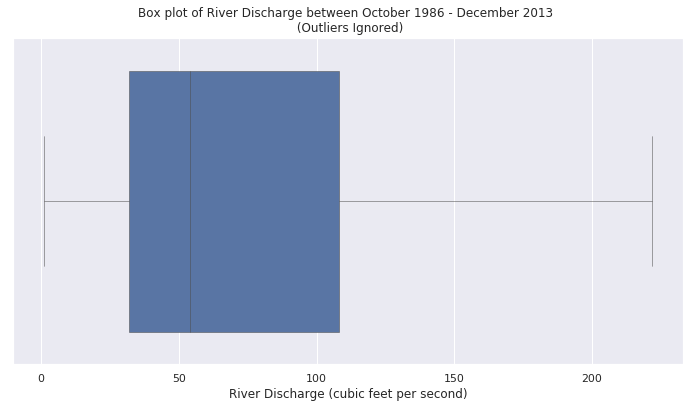

In [51]:
plt.figure(figsize=(12, 6));
sns.boxplot(df['disValue'], showfliers=False)

plt.xlabel('River Discharge (cubic feet per second)')
plt.title('Box plot of River Discharge between October 1986 - December 2013 \n (Outliers Ignored)');

Plot a histogram of the daily discharge values.

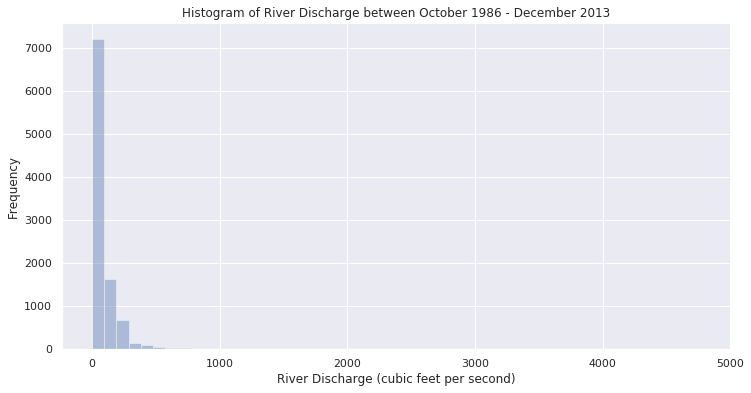

In [52]:
plt.figure(figsize=(12, 6));
sns.distplot(df['disValue'], kde=False)
plt.xlabel('River Discharge (cubic feet per second)')
plt.ylabel('Frequency')
plt.title('Histogram of River Discharge between October 1986 - December 2013');

The plot above is too dominated by outliers. As such, a plot of river discharge can created considering only values that are **below 3 standard deviation** from the mean.

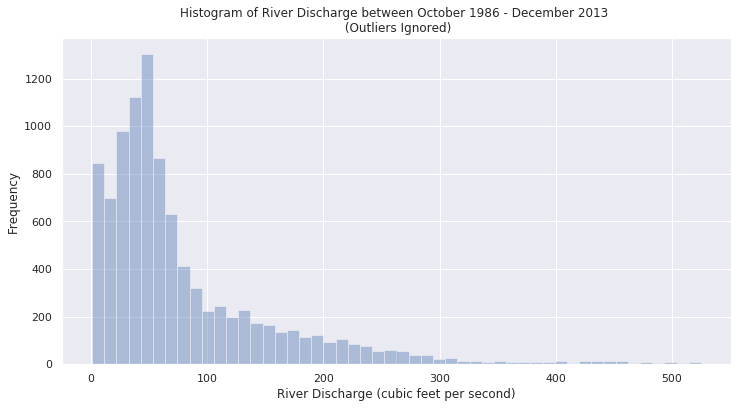

In [53]:
plt.figure(figsize=(12, 6));
sns.distplot(df[zscore(df['disValue']) < 3], kde=False)
plt.xlabel('River Discharge (cubic feet per second)')
plt.ylabel('Frequency')
plt.title('Histogram of River Discharge between October 1986 - December 2013 \n (Outliers Ignored)');

A plot of river discharge can created considering only values that are **above 3 standard deviation** from the mean. This will help to study the outliers.

/home/david/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


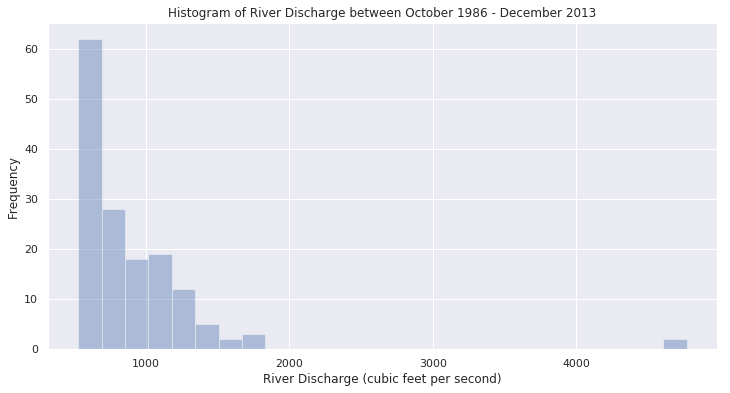

In [74]:
river_discharge_outliers = df[zscore(df['disValue']) > 3]


plt.figure(figsize=(12, 6));
sns.distplot(river_discharge_outliers, kde=False)
plt.xlabel('River Discharge (cubic feet per second)')
plt.ylabel('Frequency')
plt.title('Histogram of River Discharge between October 1986 - December 2013');

The percentage of river discharge recordings that lie above three standard deviations can be calculated:

In [75]:
percentage_outliers = (len(river_discharge_outliers)/len(df))*100

print('The percentage of recordings that are above three standard deviations from the mean is: {:.2f}%'.format(percentage_outliers))

The percentage of recordings that are above three standard deviations from the mean is: 1.52%


The most significant river discharge events can be determined. This can be done by grouping the outliers into Year-Month format, determining the mean in each group, then sorting them from high to low.

In [93]:
river_discharge_outliers.to_period('M').groupby('datetime').mean().sort_values(by='disValue', ascending=False)

,disValue
datetime,
2013-09,1624.714286
2003-05,1273.750000
1997-06,1057.272727
2003-06,975.333333
1995-06,945.520000
1999-08,887.000000
1995-05,866.818182
1993-06,806.000000
2011-07,750.812500


In [94]:
df['MONTH'] = df.index.month

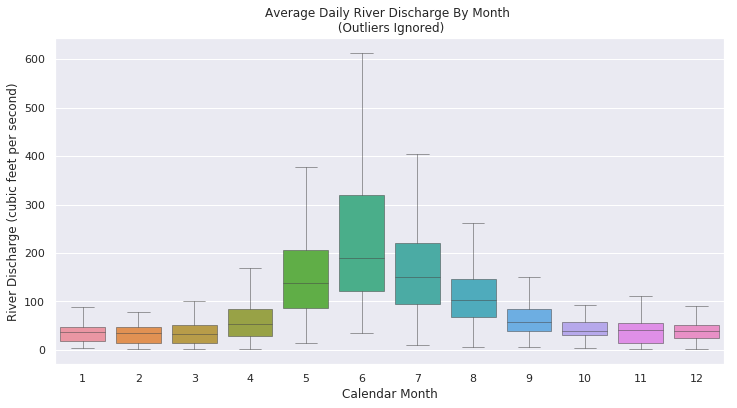

In [98]:
plt.figure(figsize=(12, 6));
sns.boxplot(data=df, x='MONTH', y='disValue', showfliers=False)

plt.xlabel('Calendar Month')
plt.ylabel('River Discharge (cubic feet per second)')
plt.title('Average Daily River Discharge By Month \n (Outliers Ignored)');

A new dataframe called `df_monthly` is created that resamples the river discharge by month and determines the mean of it. 

In [15]:
df_monthly = df.resample('M').mean()

Use seaborn to plot the mean river discharge by month.

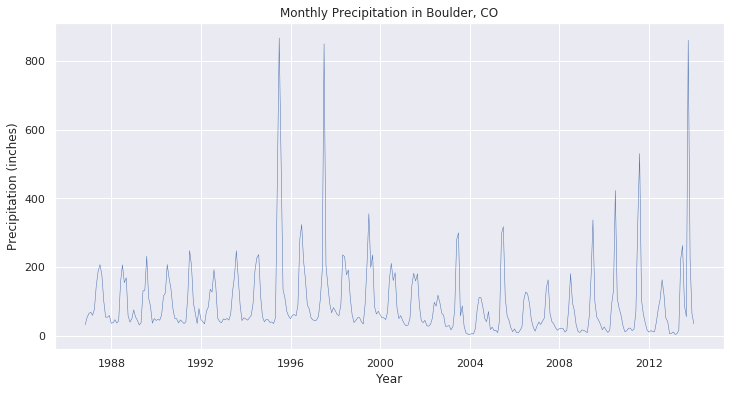

In [16]:
# decrease linewidth
sns.set(rc={"lines.linewidth": 0.5})

# increase plot size
plt.figure(figsize=(12, 6));

sns.lineplot(data=df_monthly, legend=False)
plt.xlabel('Year')
plt.ylabel('Precipitation (inches)')
plt.title('Monthly Precipitation in Boulder, CO');

As can be seen, the graph shows a lot of variability in the precipitation by month. One can see the sharp peak that occurred during the September 2013 flood.

In order to better understand the variability of the precipitation by month, a histogram can be constructed.

/home/david/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


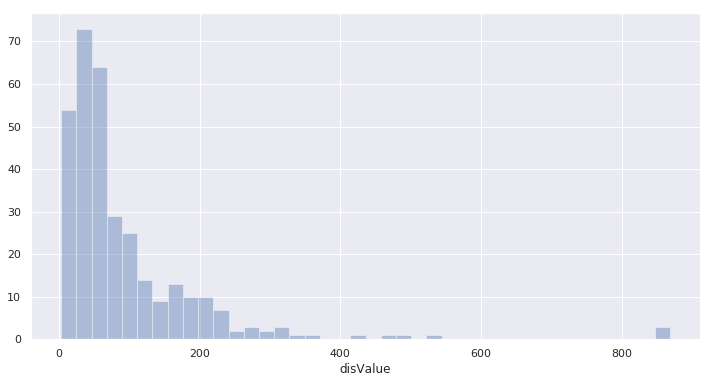

In [17]:
plt.figure(figsize=(12, 6));
sns.distplot(df_monthly['disValue'],kde=False)

How does the monthly precipitation vary between the months of the year? To answer this question, a column called `MONTH` that explicitly records the month can be created.

In [107]:
df_monthly['MONTH'] = df_monthly.index.month

A boxplot can be created for the precipitation for each of the calendar months. 

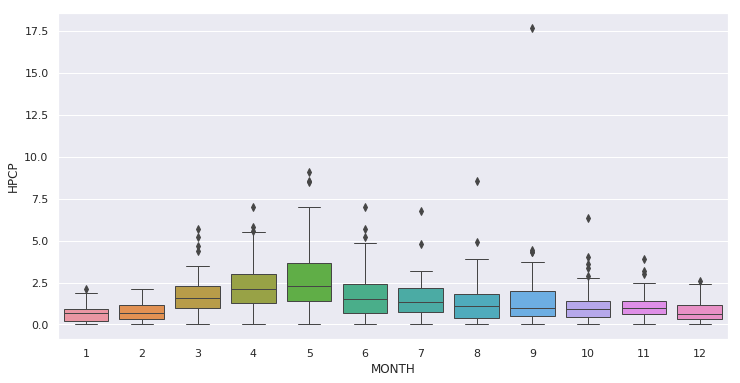

In [119]:
plt.figure(figsize=(12, 6));
sns.boxplot(data=df_monthly, x='MONTH', y='HPCP', showfliers=True)

As can be seen from the plot above, the most rainfall occurs in May and the least in December. The flood of September 2013 is seen as an outlier. The same boxplot can be shown with outliers removed.

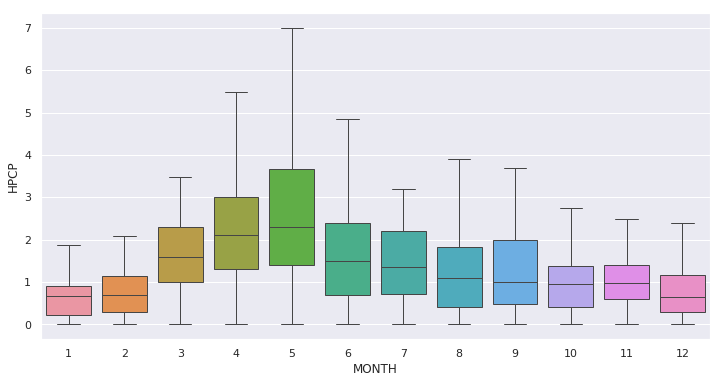

In [120]:
plt.figure(figsize=(12, 6));
sns.boxplot(data=df_monthly, x='MONTH', y='HPCP', showfliers=False)

Yearly precipitation can also be considered. The dataframe `df_yearly` can be created that shows annual precipitation.

In [147]:
df_yearly = df.resample('Y').sum()

A scatterplot can be created that shows the annual precipitation in Boulder, CO.

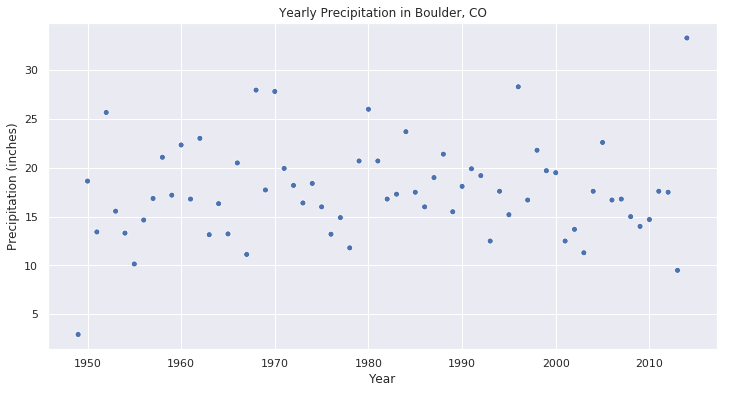

In [56]:
sns.set(rc={"lines.linewidth": 1})


plt.figure(figsize=(12, 6));


sns.scatterplot(data=df_yearly, legend=False)
plt.xlabel('Year')
plt.ylabel('Precipitation (inches)')
plt.title('Annual Precipitation in Boulder, CO');

A histogram can be constructed for the annual precipitation in Boulder.

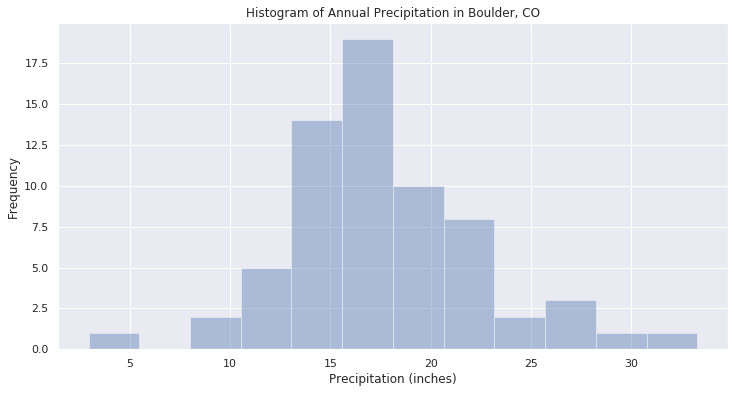

In [159]:
plt.figure(figsize=(12, 6));
sns.distplot(df_yearly['HPCP'], kde=False)
plt.xlabel('Precipitation (inches)')
plt.ylabel('Frequency')
plt.title('Histogram of Annual Precipitation in Boulder, CO');

Total precipitation in each decade can be determined. This will allow comparisons between the decades to me made. A new dataframe `df_decade` can be constructed that shows the total precipitation for each of the decades.

In [168]:
df_decade = df_yearly.groupby((df_yearly.index.year//10)*10).median()
df_decade.reset_index(inplace=True)

In [169]:
df_decade

,DATE,HPCP,DECADE
0,1940,10.785,1940
1,1950,16.210,1950
2,1960,17.265,1960
3,1970,17.300,1970
4,1980,17.800,1980
5,1990,19.350,1990
6,2000,14.850,2000
7,2010,17.550,2010


The first and last decades do not have complete data, as such, we need to drop the decades 1940-1950 and 2010-2020.

In [170]:
df_decade = df_decade.drop([0,7])

A bar plot can be made that shows the total rainfall for each of the decades.

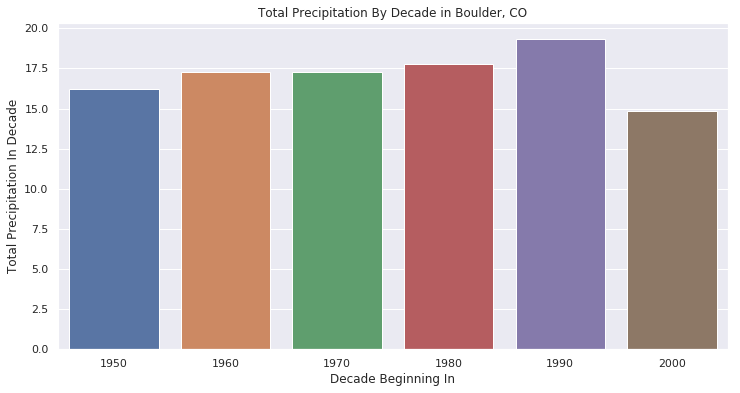

In [174]:
plt.figure(figsize=(12, 6));
sns.barplot(data=df_decade, x='DATE', y='HPCP')
plt.xlabel('Decade Beginning In')
plt.ylabel('Total Precipitation In Decade')
plt.title('Total Precipitation By Decade in Boulder, CO');


The annual precipitation can also be grouped into decades so that a box plot can be produced. In order to do this, a column `DECADE` can be constructed in the `df_yearly` dataframe that explicitly records the decade each year falls in.

In [175]:
df_yearly['DECADE']=(df_yearly.index.year//10)*10

In [176]:
df_yearly

,HPCP,DECADE
DATE,,
1948-12-31,2.93,1940
1949-12-31,18.64,1940
1950-12-31,13.43,1950
1951-12-31,25.67,1950
1952-12-31,15.56,1950
1953-12-31,13.31,1950
1954-12-31,10.15,1950
1955-12-31,14.65,1950
1956-12-31,16.86,1950


A box plot can now be produced which groups the years of each decade separately. 

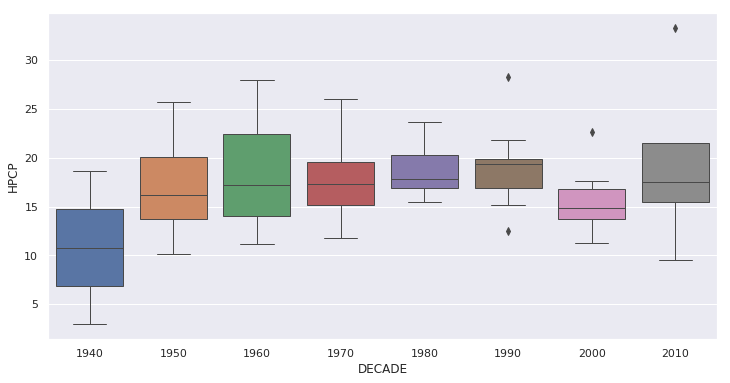

In [178]:
plt.figure(figsize=(12, 6));
sns.boxplot(data=df_yearly, x='DECADE', y='HPCP', showfliers=True)